<a href="https://colab.research.google.com/github/1NarendraSingh1/Data-Exploration-using-panada-advance-aggregate-and-window-functions/blob/main/Agregate%26Windows_Using_PandasSchema.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Rolling function on Google Stock

In [70]:
import pandas as pd
from IPython.display import display as dp
import numpy as np

In [71]:
df=pd.read_csv("/content/drive/MyDrive/Files Data science/Google_Stock_Price_Test.csv")

In [72]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [73]:
dp(df.head())
df['Date']=pd.to_datetime(df['Date'])

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    20 non-null     datetime64[ns]
 1   Open    20 non-null     float64       
 2   High    20 non-null     float64       
 3   Low     20 non-null     float64       
 4   Close   20 non-null     float64       
 5   Volume  20 non-null     object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 1.1+ KB


In [75]:
df=df.loc[df['Date']<="1/1/2018"]
df.shape

(20, 6)

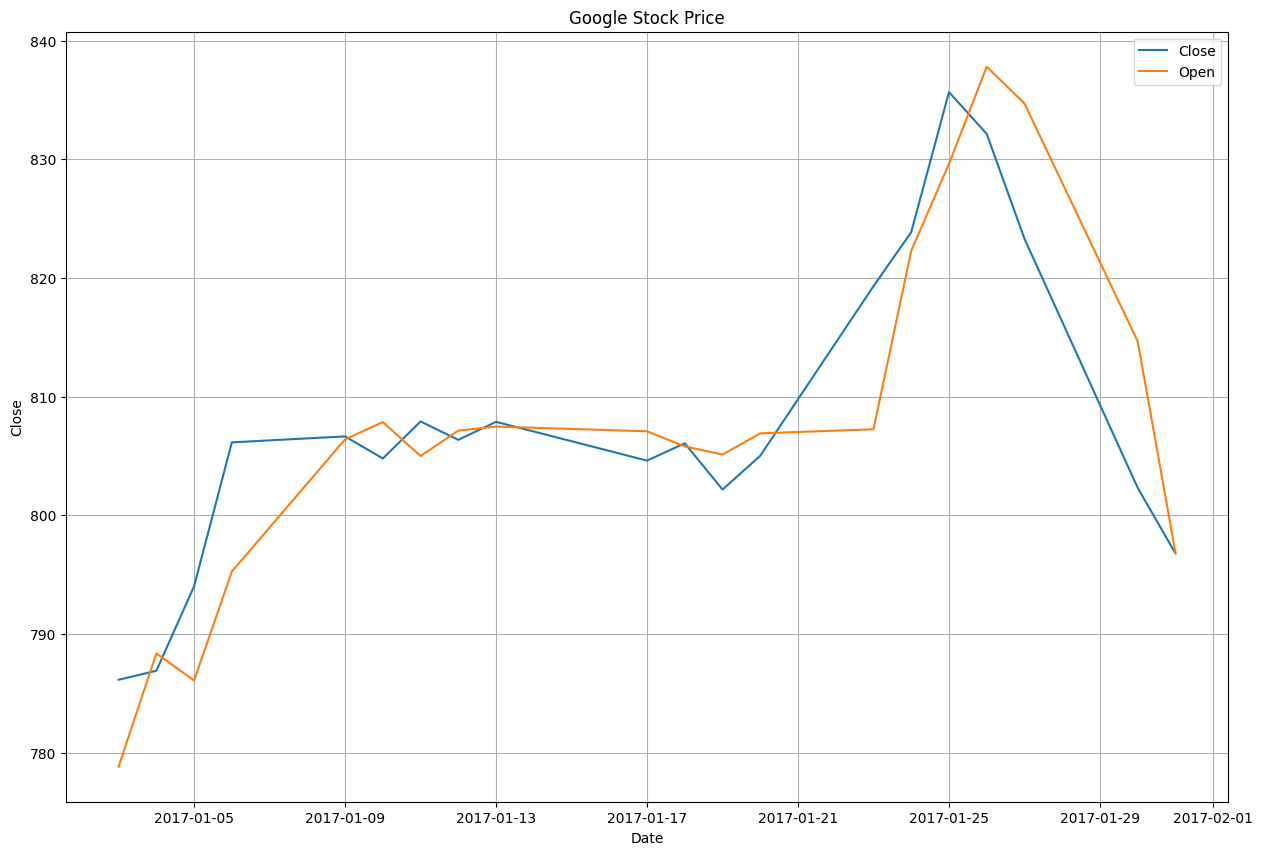

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.plot('Date','Close',data=df,label='Close')
plt.plot('Date','Open',data=df,label='Open')
plt.grid(True)
plt.legend()

plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Google Stock Price')

plt.show()

In [77]:
df["avg3"]=df['Close'].rolling(window=3).mean()
df["avg5"]=df['Close'].rolling(window=5).mean()
df["avg3s"]=df['Close'].rolling(window=3).mean().shift(-2)
df["avg5s"]=df['Close'].rolling(window=5).mean().shift(-4)

In [78]:
df

,Date,Open,High,Low,Close,Volume,avg3,avg5,avg3s,avg5s
0,2017-01-03,778.81,789.63,775.80,786.14,"1,657,300",NaN,NaN,789.020000,795.972
1,2017-01-04,788.36,791.34,783.16,786.90,"1,073,000",NaN,NaN,795.690000,799.702
2,2017-01-05,786.08,794.48,785.02,794.02,"1,335,200",789.020000,NaN,802.273333,803.904
3,2017-01-06,795.26,807.90,792.20,806.15,"1,640,200",795.690000,NaN,805.863333,806.372
4,2017-01-09,806.40,809.97,802.83,806.65,"1,272,400",802.273333,795.972,806.450000,806.718
5,2017-01-10,807.86,809.13,803.51,804.79,"1,176,800",805.863333,799.702,806.353333,806.310
6,2017-01-11,805.00,808.15,801.37,807.91,"1,065,900",806.450000,803.904,807.383333,806.566
7,2017-01-12,807.14,807.39,799.17,806.36,"1,353,100",806.353333,806.372,806.283333,805.418
8,2017-01-13,807.48,811.22,806.69,807.88,"1,099,200",807.383333,806.718,806.186667,805.150
9,2017-01-17,807.08,807.14,800.37,804.61,"1,362,100",806.283333,806.310,804.283333,807.436


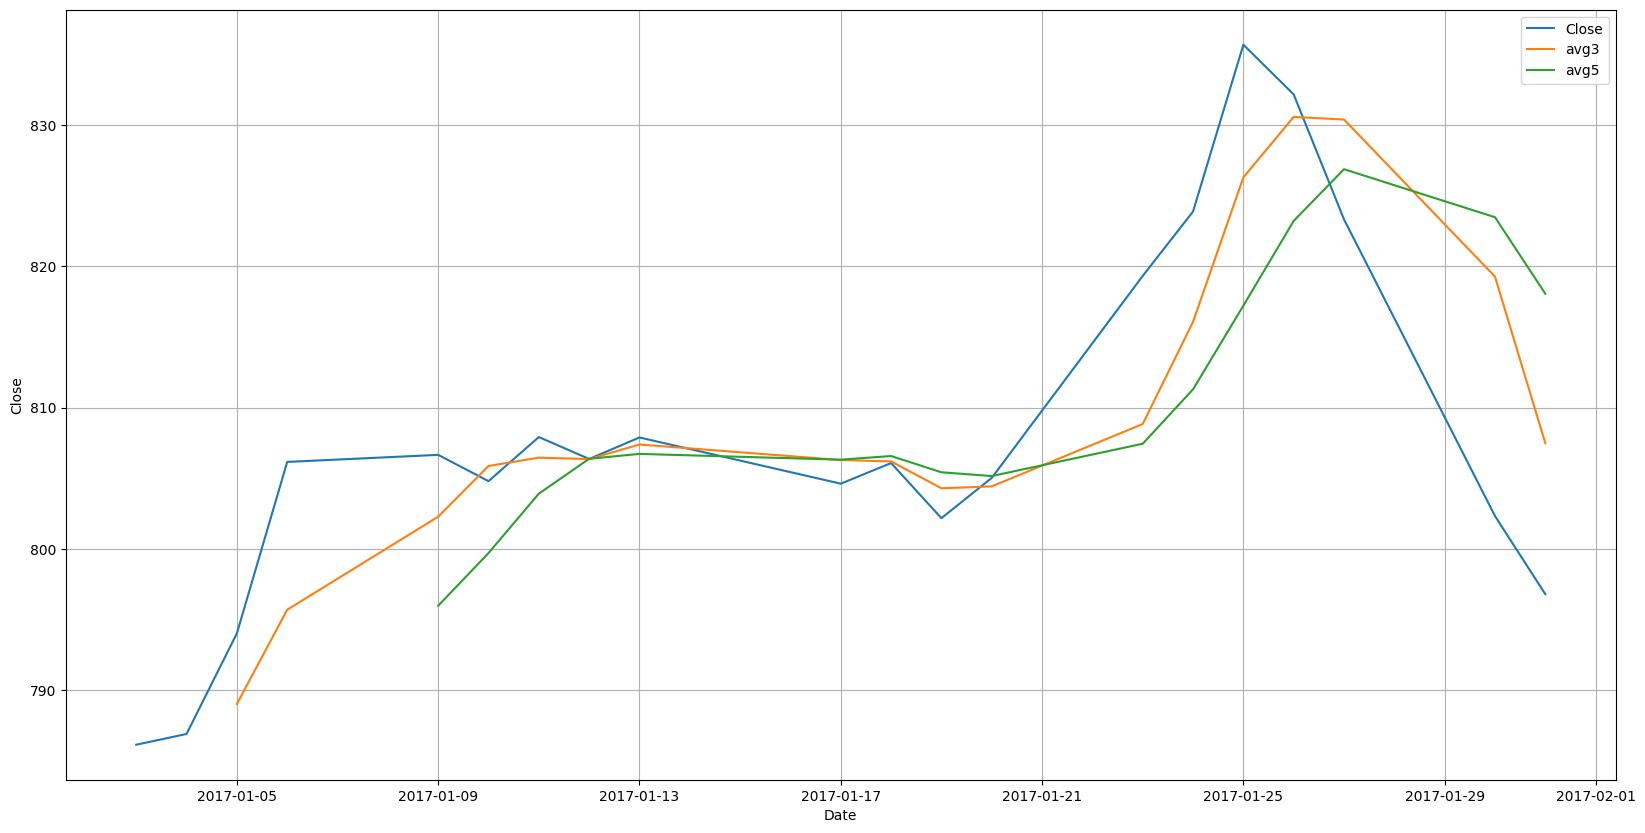

In [79]:
plt.figure(figsize=(20,10))
plt.plot('Date','Close',data=df,label='Close')
plt.plot('Date','avg3',data=df,label='avg3')
plt.plot('Date','avg5',data=df,label='avg5')
plt.grid(True)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Close')

plt.show()

#**Pandas Windows Functions**

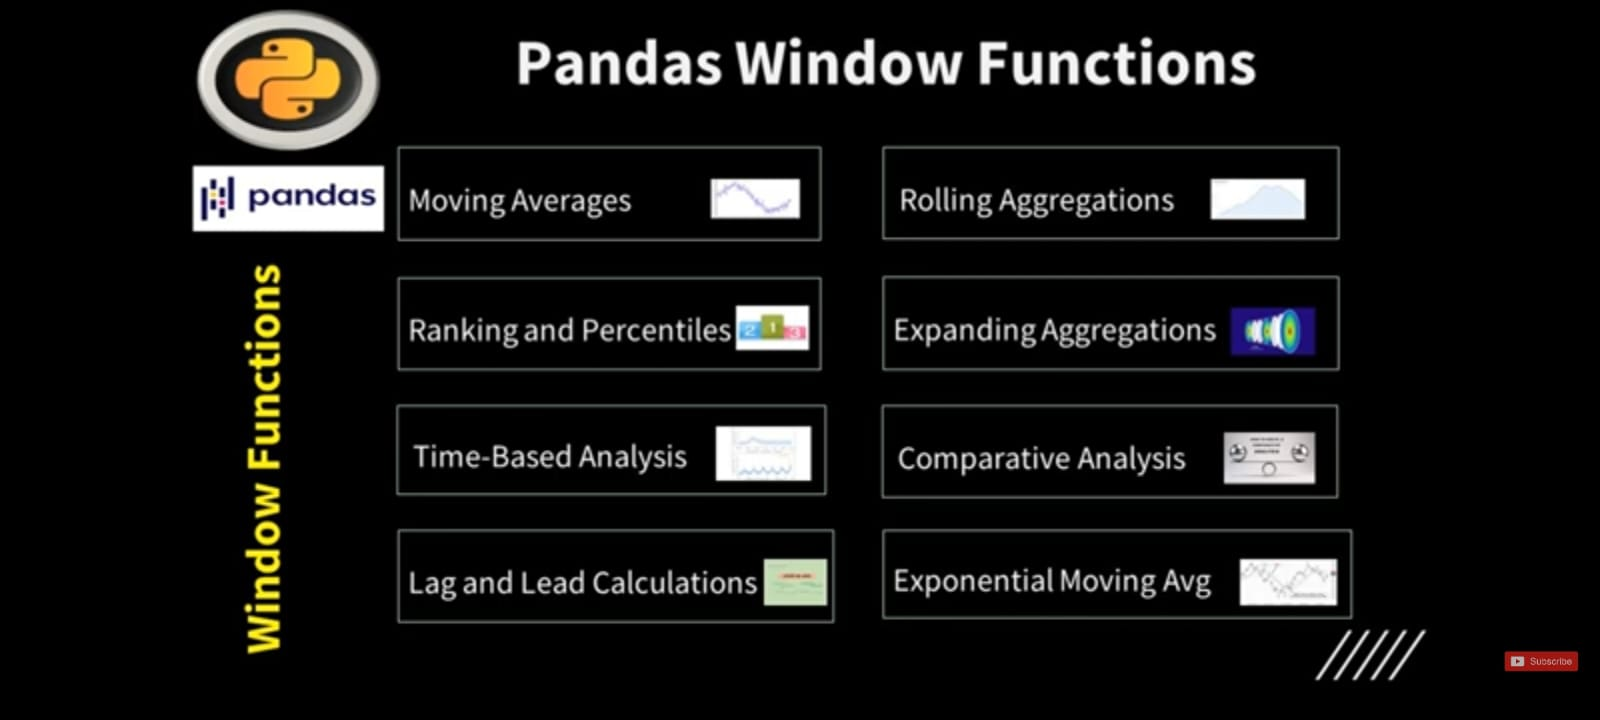

In [80]:
import seaborn as sns
from vega_datasets import data

In [81]:
df1=data.stocks()

In [82]:
df1

,symbol,date,price
0,MSFT,2000-01-01,39.81
1,MSFT,2000-02-01,36.35
2,MSFT,2000-03-01,43.22
3,MSFT,2000-04-01,28.37
4,MSFT,2000-05-01,25.45
...,...,...,...
555,AAPL,2009-11-01,199.91
556,AAPL,2009-12-01,210.73
557,AAPL,2010-01-01,192.06
558,AAPL,2010-02-01,204.62


In [83]:
df1['symbol'].value_counts()

,count
symbol,
MSFT,123
AMZN,123
IBM,123
AAPL,123
GOOG,68


**Lead & Lag Operator**

In [84]:
#Previous close price
df1["price_lag"]=df1['price'].shift(1)

df1['price_lead']=df1['price'].shift(-1)

In [85]:
df1

,symbol,date,price,price_lag,price_lead
0,MSFT,2000-01-01,39.81,NaN,36.35
1,MSFT,2000-02-01,36.35,39.81,43.22
2,MSFT,2000-03-01,43.22,36.35,28.37
3,MSFT,2000-04-01,28.37,43.22,25.45
4,MSFT,2000-05-01,25.45,28.37,32.54
...,...,...,...,...,...
555,AAPL,2009-11-01,199.91,188.50,210.73
556,AAPL,2009-12-01,210.73,199.91,192.06
557,AAPL,2010-01-01,192.06,210.73,204.62
558,AAPL,2010-02-01,204.62,192.06,223.02


**Rolling Moving Average**
- Similarily rolling.max()/min()/sum() can be perfromed

In [86]:
df1['price_ma']=df1['price'].rolling(window=7).mean().shift(-6)

In [87]:
df1

,symbol,date,price,price_lag,price_lead,price_ma
0,MSFT,2000-01-01,39.81,NaN,36.35,33.448571
1,MSFT,2000-02-01,36.35,39.81,43.22,31.818571
2,MSFT,2000-03-01,43.22,36.35,28.37,30.130000
3,MSFT,2000-04-01,28.37,43.22,25.45,27.958571
4,MSFT,2000-05-01,25.45,28.37,32.54,27.240000
...,...,...,...,...,...,...
555,AAPL,2009-11-01,199.91,188.50,210.73,NaN
556,AAPL,2009-12-01,210.73,199.91,192.06,NaN
557,AAPL,2010-01-01,192.06,210.73,204.62,NaN
558,AAPL,2010-02-01,204.62,192.06,223.02,NaN


<Axes: xlabel='date', ylabel='price'>

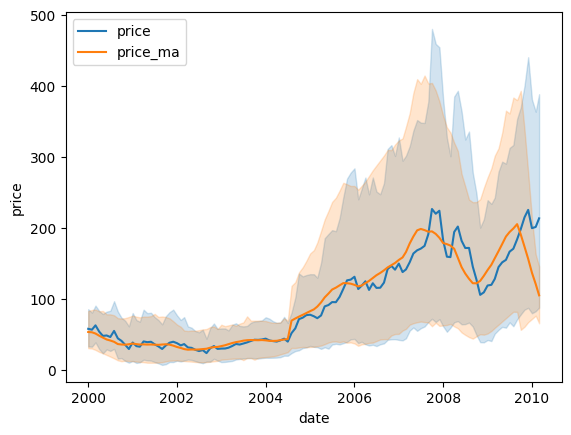

In [88]:
sns.lineplot(data=df1,x='date',y='price',label='price')
sns.lineplot(data=df1,x='date',y='price_ma',label='price_ma')
# plt.legend()

**Percentage Change in Stcok price**

In [89]:
df1['price_%change']=df1['price'].pct_change(1)*100

In [90]:
df1['price_%change'].max()

124.16666666666667

In [91]:
df1.loc[df1['price_%change']==df1['price_%change'].max()]['date']

,date
123,2000-01-01


**Cumulative Sum**
- generally used for total sales data

In [92]:
df1

,symbol,date,price,price_lag,price_lead,price_ma,price_%change
0,MSFT,2000-01-01,39.81,NaN,36.35,33.448571,NaN
1,MSFT,2000-02-01,36.35,39.81,43.22,31.818571,-8.691284
2,MSFT,2000-03-01,43.22,36.35,28.37,30.130000,18.899587
3,MSFT,2000-04-01,28.37,43.22,25.45,27.958571,-34.359093
4,MSFT,2000-05-01,25.45,28.37,32.54,27.240000,-10.292563
...,...,...,...,...,...,...,...
555,AAPL,2009-11-01,199.91,188.50,210.73,NaN,6.053050
556,AAPL,2009-12-01,210.73,199.91,192.06,NaN,5.412436
557,AAPL,2010-01-01,192.06,210.73,204.62,NaN,-8.859678
558,AAPL,2010-02-01,204.62,192.06,223.02,NaN,6.539623


In [93]:
df1['price_cumsum']=df1['price'].cumsum()

In [94]:
df1['price_cumsum1']=df1['price'].expanding().sum()

In [95]:
df1

,symbol,date,price,price_lag,price_lead,price_ma,price_%change,price_cumsum,price_cumsum1
0,MSFT,2000-01-01,39.81,NaN,36.35,33.448571,NaN,39.81,39.81
1,MSFT,2000-02-01,36.35,39.81,43.22,31.818571,-8.691284,76.16,76.16
2,MSFT,2000-03-01,43.22,36.35,28.37,30.130000,18.899587,119.38,119.38
3,MSFT,2000-04-01,28.37,43.22,25.45,27.958571,-34.359093,147.75,147.75
4,MSFT,2000-05-01,25.45,28.37,32.54,27.240000,-10.292563,173.20,173.20
...,...,...,...,...,...,...,...,...,...
555,AAPL,2009-11-01,199.91,188.50,210.73,NaN,6.053050,55580.77,55580.77
556,AAPL,2009-12-01,210.73,199.91,192.06,NaN,5.412436,55791.50,55791.50
557,AAPL,2010-01-01,192.06,210.73,204.62,NaN,-8.859678,55983.56,55983.56
558,AAPL,2010-02-01,204.62,192.06,223.02,NaN,6.539623,56188.18,56188.18


In [96]:
df1['mean_diff']=df1['price']-df1['price'].rolling(5).mean()
df1

,symbol,date,price,price_lag,price_lead,price_ma,price_%change,price_cumsum,price_cumsum1,mean_diff
0,MSFT,2000-01-01,39.81,NaN,36.35,33.448571,NaN,39.81,39.81,NaN
1,MSFT,2000-02-01,36.35,39.81,43.22,31.818571,-8.691284,76.16,76.16,NaN
2,MSFT,2000-03-01,43.22,36.35,28.37,30.130000,18.899587,119.38,119.38,NaN
3,MSFT,2000-04-01,28.37,43.22,25.45,27.958571,-34.359093,147.75,147.75,NaN
4,MSFT,2000-05-01,25.45,28.37,32.54,27.240000,-10.292563,173.20,173.20,-9.190
...,...,...,...,...,...,...,...,...,...,...
555,AAPL,2009-11-01,199.91,188.50,210.73,NaN,6.053050,55580.77,55580.77,18.838
556,AAPL,2009-12-01,210.73,199.91,192.06,NaN,5.412436,55791.50,55791.50,20.190
557,AAPL,2010-01-01,192.06,210.73,204.62,NaN,-8.859678,55983.56,55983.56,-3.250
558,AAPL,2010-02-01,204.62,192.06,223.02,NaN,6.539623,56188.18,56188.18,5.456


#**Use of Filter Function**

The filter() function in Pandas is used to subset columns or index labels based on specific criteria such as labels, regex patterns, or like matches. Here's how you can use it:

Parameters

items: List of column/index labels to keep.

like: Substring that should be present in the column/index labels.

regex: Regular expression pattern to match column/index labels.

axis:

0 for filtering row labels (index).

1 for filtering column labels.

In [97]:
# DataFrame.filter(items=None, like=None, regex=None, axis=None)

In [98]:
#Filtering by columns name
filtered_df = df1.filter(items=['symbol', 'price'])
print(filtered_df)

    symbol   price
0     MSFT   39.81
1     MSFT   36.35
2     MSFT   43.22
3     MSFT   28.37
4     MSFT   25.45
..     ...     ...
555   AAPL  199.91
556   AAPL  210.73
557   AAPL  192.06
558   AAPL  204.62
559   AAPL  223.02

[560 rows x 2 columns]


In [99]:
# Keep only columns that contain "a"
filtered_df = df1.filter(like='b', axis=1)
print(filtered_df)


    symbol
0     MSFT
1     MSFT
2     MSFT
3     MSFT
4     MSFT
..     ...
555   AAPL
556   AAPL
557   AAPL
558   AAPL
559   AAPL

[560 rows x 1 columns]


In [100]:
# Keep only columns that start with "s"
filtered_df = df1.filter(regex='^s', axis=1)
print(filtered_df)


    symbol
0     MSFT
1     MSFT
2     MSFT
3     MSFT
4     MSFT
..     ...
555   AAPL
556   AAPL
557   AAPL
558   AAPL
559   AAPL

[560 rows x 1 columns]


In [107]:
# Set index
# df1.set_index('symbol', inplace=True)

# Keep specific rows by index
filtered_df = df1.filter(like='A',axis=0)
print(filtered_df)


             date   price  price_lag  price_lead   price_ma  price_%change  \
symbol                                                                       
AMZN   2000-01-01   64.56      28.80       68.87  52.908571     124.166667   
AMZN   2000-02-01   68.87      64.56       67.00  49.614286       6.675960   
AMZN   2000-03-01   67.00      68.87       55.19  45.267143      -2.715261   
AMZN   2000-04-01   55.19      67.00       48.31  40.927143     -17.626866   
AMZN   2000-05-01   48.31      55.19       36.31  36.570000     -12.466026   
...           ...     ...        ...         ...        ...            ...   
AAPL   2009-11-01  199.91     188.50      210.73        NaN       6.053050   
AAPL   2009-12-01  210.73     199.91      192.06        NaN       5.412436   
AAPL   2010-01-01  192.06     210.73      204.62        NaN      -8.859678   
AAPL   2010-02-01  204.62     192.06      223.02        NaN       6.539623   
AAPL   2010-03-01  223.02     204.62         NaN        NaN     

#**More Advanced Filtering with Python and Sql concepts**

In [ ]:

# import pandas as pd

# # Sample DataFrame
# df = pd.DataFrame({
#     'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank'],
#     'age': [25, 35, 30, 40, 28, 42],
#     'salary': [50000, 70000, 60000, 80000, 55000, 90000],
#     'department': ['HR', 'IT', 'Finance', 'IT', 'HR', 'Finance']
# })

# # 2. Filtering Based on Custom Function (apply())
# # You can define your own function and apply it row-wise (axis=1).

# # Define a custom filter function
# def high_earners(row):
#     return row['salary'] > 60000 and row['age'] < 40

# # Apply custom function
# filtered_df = df[df.apply(high_earners, axis=1)]
# print(filtered_df)


# # 3. Filtering Using Numpy Vectorized Operations
# # Using NumPy makes filtering super-efficient for large datasets.

# import numpy as np

# # Using vectorized NumPy operations
# filtered_df = df[np.logical_and(df['salary'] > 60000, df['age'] < 40)]
# print(filtered_df)


# # 4. Filtering Rows Based on Previous Row Values (shift())
# # Useful for filtering trends in time-series data.

# df['salary_change'] = df['salary'].diff()  # Calculate change in salary
# filtered_df = df[df['salary_change'] > 5000]  # Filter where salary increased significantly
# print(filtered_df)

# # 5. Filtering Using .nlargest() and .nsmallest()
# # Quickly get top/bottom N records.

# top_earners = df.nlargest(3, 'salary')
# print(top_earners)

# youngest_employees = df.nsmallest(3, 'age')
# print(youngest_employees)


# # 6. Filtering Using Rolling Windows (rolling())
# # Great for trend analysis in time-series data.

# df['rolling_avg_salary'] = df['salary'].rolling(window=2).mean()
# filtered_df = df[df['rolling_avg_salary'] > 60000]
# print(filtered_df)


# # 7. Filtering Outliers Using Z-Score
# # This is useful for anomaly detection.

# from scipy import stats

# # Compute Z-scores
# df['z_score'] = stats.zscore(df['salary'])

# # Keep only records within 2 standard deviations
# filtered_df = df[df['z_score'].abs() < 2]
# print(filtered_df)


# # 8. Filtering with Fuzzy Matching (Text Similarity)
# # Useful when filtering based on approximate matches.

# from fuzzywuzzy import process

# # Target name to match
# target = "Alic"

# # Find closest match
# match, score = process.extractOne(target, df['name'])
# print(f"Best match: {match} with score: {score}")

# # Filter rows with high similarity scores
# filtered_df = df[df['name'] == match]
# print(filtered_df)


# # 9. Filtering Using SQL-Like Expressions (pandasql)
# # If you prefer SQL-style filtering, use pandasql.

# from pandasql import sqldf

# query = "SELECT * FROM df WHERE age > 30 AND salary > 60000"
# filtered_df = sqldf(query, globals())
# print(filtered_df)


# # 10. Filtering Using .explode() for Multi-Valued Columns
# # If a column contains lists, explode() helps in filtering.

# df_explode = pd.DataFrame({
#     'name': ['Alice', 'Bob', 'Charlie'],
#     'skills': [['Python', 'SQL'], ['Java', 'C++'], ['Python', 'ML']]
# })

# df_explode = df_explode.explode('skills')
# filtered_df = df_explode[df_explode['skills'] == 'Python']
# print(filtered_df)


# # Conclusion
# # These advanced filtering techniques give you full control over data manipulation. Depending on your dataset and goals, you can:
# # ✅ Filter by aggregated values
# # ✅ Use custom functions for complex conditions
# # ✅ Detect trends and outliers
# # ✅ Leverage SQL queries for filtering
# # ✅ Apply text similarity for approximate matches